In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#import gspread
#from gspread_dataframe import get_as_dataframe, set_with_dataframe
#from google.colab import auth
#auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default()) 
#from google.colab import files
#uploaded = files.upload()

In [3]:
#import io
#train_dataset = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
train_dataset = pd.read_csv("F:\\Stevens_Masters\\Fall 18\\KDD\\Project\\Image_Reco\\train.csv")


In [4]:

#train_dataset=pd.DataFrame(sheet.get_all_records())

In [5]:
train_dataset.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
#test_dataset=pd.read_csv("test.csv")

In [ ]:
#test_dataset.head()

In [6]:
X=train_dataset.iloc[:,1:]
Y=train_dataset["label"]

In [ ]:
#knn.fit(X, Y)

In [ ]:
#test_predict = knn.predict(test_dataset)

In [ ]:
#test_predict

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25)

In [8]:
X_test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
36184       0       0       0       0       0       0       0       0       0   
18473       0       0       0       0       0       0       0       0       0   
24618       0       0       0       0       0       0       0       0       0   
31347       0       0       0       0       0       0       0       0       0   
23840       0       0       0       0       0       0       0       0       0   

       pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
36184       0    ...            0         0         0         0         0   
18473       0    ...            0         0         0         0         0   
24618       0    ...            0         0         0         0         0   
31347       0    ...            0         0         0         0         0   
23840       0    ...            0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
36184         0         0         0         0         0  
18473         0         0         0         0         0  
24618         0         0         0         0         0  
31347         0         0         0         0         0  
23840         0         0         0         0         0  

[5 rows x 784 columns]

In [9]:
kvalue=[1,2,3,4,5,6,7,8,9,10]



In [9]:
X_train=X_train/255
X_test=X_test/255

In [11]:
accuracy_Percent=[]
for num in kvalue:
    knn = KNeighborsClassifier(n_neighbors=num)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    temp=accuracy_score(y_test, y_pred)
    accuracy_Percent.append(temp)
    print("Accuracy score when k="+str(num))
    print(temp)

Accuracy score when k=1
0.9660952380952381
Accuracy score when k=2
0.9581904761904761
Accuracy score when k=3
0.9682857142857143
Accuracy score when k=4
0.9677142857142857
Accuracy score when k=5
0.969047619047619
Accuracy score when k=6
0.9683809523809523
Accuracy score when k=7
0.9668571428571429
Accuracy score when k=8
0.9652380952380952
Accuracy score when k=9
0.9646666666666667
Accuracy score when k=10
0.9639047619047619


In [10]:
import matplotlib.pyplot as py
import matplotlib
import pylab

In [13]:
print(accuracy_Percent)

[0.9660952380952381, 0.9581904761904761, 0.9682857142857143, 0.9677142857142857, 0.969047619047619, 0.9683809523809523, 0.9668571428571429, 0.9652380952380952, 0.9646666666666667, 0.9639047619047619]


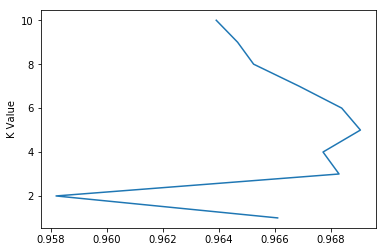

In [14]:
py.plot(accuracy_Percent,kvalue)
#py.axis([0.95,0.97])
py.ylabel("K Value")
#print(matplotlib.backends.backend)
py.show()

In [16]:
#MNIST Dataset validation with k=5

In [11]:
from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

In [13]:
x_train.shape


(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
totalLength=x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(x_train.shape[0],totalLength)
x_test=x_test.reshape(x_test.shape[0],totalLength)

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(x_train)
temp=accuracy_score(Y_train, Y_pred)  
Y_pred_duplicate=Y_pred
print("Accuracy score for mnist train data")
print(temp)
Y_pred = knn.predict(x_test)
temp=accuracy_score(Y_test, Y_pred)  
print("Accuracy score for mnist test data")
print(temp)

Accuracy score for mnist train data
0.97
Accuracy score for mnist test data
0.9698


In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(Y_train, Y_pred_duplicate))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      5923
          1       0.95      0.99      0.97      6742
          2       0.98      0.96      0.97      5958
          3       0.97      0.97      0.97      6131
          4       0.98      0.97      0.97      5842
          5       0.96      0.96      0.96      5421
          6       0.98      0.99      0.98      5918
          7       0.96      0.97      0.97      6265
          8       0.99      0.92      0.95      5851
          9       0.95      0.96      0.96      5949

avg / total       0.97      0.97      0.97     60000



In [20]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.96      1.00      0.98      1135
          2       0.98      0.96      0.97      1032
          3       0.97      0.97      0.97      1010
          4       0.98      0.96      0.97       982
          5       0.96      0.98      0.97       892
          6       0.98      0.98      0.98       958
          7       0.95      0.96      0.96      1028
          8       0.99      0.93      0.96       974
          9       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000



True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [21]:
validation_dataset = pd.read_csv("F:\\Stevens_Masters\\Fall 18\\KDD\\Project\\Image_Reco\\validation.csv")

In [23]:
Validation_train=validation_dataset.iloc[:,1:]

In [24]:
validation_test=validation_dataset["label"]

In [28]:
Validation_train.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [25]:
validation_predict=knn.predict(Validation_train)

In [29]:
validation_test.head()

0    0
1    1
2    5
3    8
4    7
Name: label, dtype: int64

In [26]:
validation_predict

array([0, 1, 5, 8, 7], dtype=int64)

In [46]:
validation_test[0:5]

0    0
1    1
2    5
3    8
4    7
Name: label, dtype: int64

In [30]:
print(classification_report(validation_test, validation_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         5

